# Hypothetical Problem Statement:

#### I have chosen to work for a computer hardware and software manufacturing company, the task assigned to me is to predict the sentiments of tweets based on previous observations to facilitate the customer complaint redressal and marketing team of the company to draw inferences and also for the research and development team to drive insights into real world issues occuring with the product range of the company.
#### Importance: It is important for a manufacturing concern such as the one I am hypothetically employed by to engage in and understand customer feedback and work accordingly to better it's services. Sometimes customers may or may not be able to report issues through the company's complaint redressal and servicing channels due to various reasons. In the modern age of social media engagement, it thus becomes even more imperative for a company to continuously work towards customer feedbacks and product improvement by harnessing the power of social media reviews and customers sharing experiences.
#### Benefits from predicting sentiments: Primarily for product and service enhancement, however, keeping a close eye on engagement from customers and wider public could also create a positive image for the company among the target customer bases. Segregating tweets by sentiment also leads to decrease in burden on further analysis of review comments based on importance of the contextual comment. For instance, a negative tweet may be highlighted as one to pay attention to more so than a positive comment might be.
#### The relevant data may be collected from web scraping of twitter data from the company's official account. For our purpose, we have taken a sentiment and emotion analysis dataset from the opensource website kaggle (https://www.kaggle.com/datasets/ankitkumar2635/sentiment-and-emotions-of-tweets/data).
#### Formulating the problem as a machine learning task: The problem at hand is a classification task to predict whether a tweet can be classified as negative in sentiment, positive or neutral. To do this I will clean the dataset chosen (given), run data preprocessing tasks on it to make it more comfortable for my machine learning models to learn from, training various Machine learning algorithms on it and finding the best algorithm and checking it on various metrics of performance.

# Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import nltk
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.preprocessing
import re
nltk.download('punkt')
nltk.download('stopwords')
import sklearn.model_selection
import sklearn.feature_extraction.text
from sklearn.model_selection import train_test_split
import tensorflow as tf
import sklearn.ensemble
import lightgbm

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Loading the Dataset

In [ ]:
df = pd.read_csv("sentiment-emotion-labelled_Dell_tweets.csv")
df.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username,sentiment,sentiment_score,emotion,emotion_score
0,0,2022-09-30 23:29:15+00:00,1575991191170342912,@Logitech @apple @Google @Microsoft @Dell @Len...,ManjuSreedaran,neutral,0.853283,anticipation,0.587121
1,1,2022-09-30 21:46:35+00:00,1575965354425131008,@MK_habit_addict @official_stier @MortalKombat...,MiKeMcDnet,neutral,0.519470,joy,0.886913
2,2,2022-09-30 21:18:02+00:00,1575958171423752203,"As @CRN celebrates its 40th anniversary, Bob F...",jfollett,positive,0.763791,joy,0.960347
3,3,2022-09-30 20:05:24+00:00,1575939891485032450,@dell your customer service is horrible especi...,daveccarr,negative,0.954023,anger,0.983203
4,4,2022-09-30 20:03:17+00:00,1575939359160750080,@zacokalo @Dell @DellCares @Dell give the man ...,heycamella,neutral,0.529170,anger,0.776124


### Checking for duplicates in the dataframe

In [ ]:
print(df.duplicated().sum())

0


### Dropping unnecessary columns '0', 'Datetime', 'Tweet Id' and 'Username'

In [ ]:
df = df[['Text', 'sentiment', 'emotion']]
df.head()

,Text,sentiment,emotion
0,@Logitech @apple @Google @Microsoft @Dell @Len...,neutral,anticipation
1,@MK_habit_addict @official_stier @MortalKombat...,neutral,joy
2,"As @CRN celebrates its 40th anniversary, Bob F...",positive,joy
3,@dell your customer service is horrible especi...,negative,anger
4,@zacokalo @Dell @DellCares @Dell give the man ...,neutral,anger


# Data Exploration

### Checking the Shape of our dataframe and a sample of 'Text' column.

In [ ]:
print(df.shape)

text = df['Text'][1]
text

(24970, 3)


"@MK_habit_addict @official_stier @MortalKombat @newzealand She's getting a new @Dell #laptop when the one she has one only 2-3 years old.  (More than triple the price - though much higher utility). https://t.co/7WvkCw7vQf"

### Checking the data-types and whether null values exist

In [ ]:
print(df.dtypes)
print(df.isnull().sum())

Text         object
sentiment    object
emotion      object
dtype: object
Text         0
sentiment    0
emotion      0
dtype: int64


### Checking the balance of classes for our target label 'sentiment'

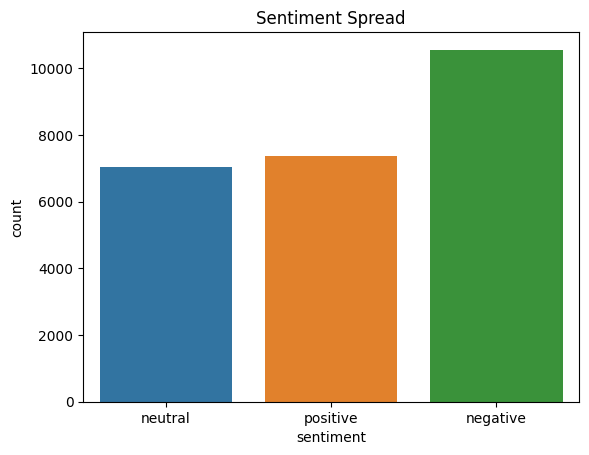

In [ ]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Spread")
plt.show()

In [ ]:
print("Class distribution between sentiments: \n", df['sentiment'].value_counts())

Class distribution between sentiments: 
 negative    10556
positive     7366
neutral      7048
Name: sentiment, dtype: int64


##### We can see that there is some imbalance between our classes, with the negative class being significantly higher in number compared to the neutral and positive classes.

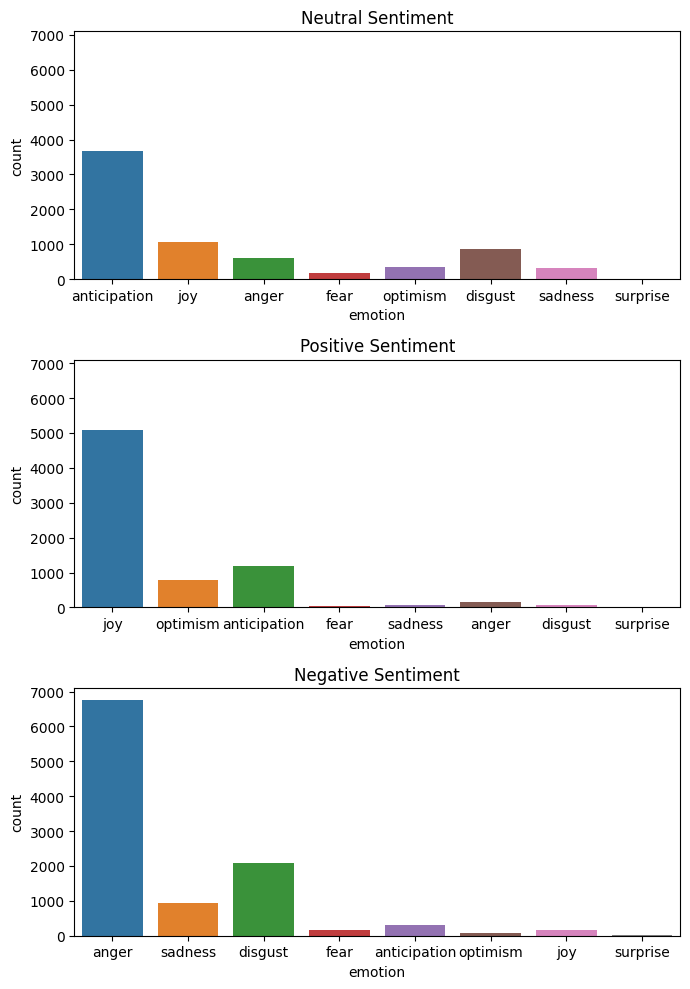

In [ ]:
fig, axes = plt.subplots(3,1, figsize = (7,10), sharey = True)

sns.countplot(data=df[df["sentiment"] == "neutral"], x='emotion', ax= axes[0])
axes[0].title.set_text('Neutral Sentiment')

sns.countplot(data=df[df["sentiment"] == "positive"], x='emotion', ax= axes[1])
axes[1].title.set_text('Positive Sentiment')

sns.countplot(data=df[df["sentiment"] == "negative"], x='emotion', ax= axes[2])
axes[2].title.set_text('Negative Sentiment')

plt.tight_layout()

##### The above graph gives us an understanding of how emotions are spread over different sentiments. In the preent analysis we will not be making use of this information but it is nevertheless an interesting way of understanding what makes up the sentiment.

### We will now proceed to remove all other columns from our dataframe, except the 'sentiment' and 'Text' columns since we only want to be able to classify sentiments on the basis of tweet texts.

In [ ]:
df = df[['Text', 'sentiment']]

# Data Preprocessing and Text Cleansing

### Transforming the target class 'sentiment' into an ordinally encoded categorical variable

In [ ]:
le = sklearn.preprocessing.LabelEncoder()

df['classification'] = le.fit_transform(df['sentiment'])

df.head()

,Text,sentiment,classification
0,@Logitech @apple @Google @Microsoft @Dell @Len...,neutral,1
1,@MK_habit_addict @official_stier @MortalKombat...,neutral,1
2,"As @CRN celebrates its 40th anniversary, Bob F...",positive,2
3,@dell your customer service is horrible especi...,negative,0
4,@zacokalo @Dell @DellCares @Dell give the man ...,neutral,1


##### We have encoded 'negative' sentiment as 0, 'neutral' as 1 and 'positive' as 2. Which seems to be reasonable in terms of sentimental progression as well. Now we shall drop the column 'sentiment' as we have extracted the necessary classes from it:

In [ ]:
df = df.drop(['sentiment'], axis=1)

### Renaming the 'Text' column to 'text'

In [ ]:
df.columns = ['text', 'classification']

### Now we shall move onto our 'text' column preprocessing and cleansing

### Firstly we will need to clean up our text as the tweet text we are working with contains a lot of unnecessary details, such as hyperlinks, tweet sender information etc. We will also make the text lowercase for our vectorization operation later to work smoothly. And lastly we will use a stemmer to stem the words down and remove prefix or suffixes

In [ ]:
def preprocessor(text):
  # making lower case
  text = text.lower()

  #removing hyperlinks
  text = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", text)

  # Keeping english characters and numbers and removing unnecesary info
  tokenizer = nltk.RegexpTokenizer(r"\w+")
  words = tokenizer.tokenize(text)

  # stemming
  porter_stemmer = nltk.stem.porter.PorterStemmer()
  stemmed_words = [porter_stemmer.stem(w) for w in words]

  return " ".join(stemmed_words)

df["cleaned_text"] = df["text"].apply(preprocessor)

df.head()

,text,classification,cleaned_text
0,@Logitech @apple @Google @Microsoft @Dell @Len...,1,whatif qwerti were modifi for programm so thin...
1,@MK_habit_addict @official_stier @MortalKombat...,1,she s get a new laptop when the one she ha one...
2,"As @CRN celebrates its 40th anniversary, Bob F...",2,as celebr it 40th anniversari bob faletra and ...
3,@dell your customer service is horrible especi...,0,your custom servic is horribl especi agent sye...
4,@zacokalo @Dell @DellCares @Dell give the man ...,1,give the man what he paid for


In [ ]:
text = df['text'][1]
print(text)

txt = df['cleaned_text'][1]
print(txt)

@MK_habit_addict @official_stier @MortalKombat @newzealand She's getting a new @Dell #laptop when the one she has one only 2-3 years old.  (More than triple the price - though much higher utility). https://t.co/7WvkCw7vQf
she s get a new laptop when the one she ha one onli 2 3 year old more than tripl the price though much higher util


##### After comparison of cleaned text with text pre-cleansing, we can be reasonably satisfied, all the necessary information to judge the tweet sentiment has been kept and unnecessary details which would confuse our learning models are removed. We shall also remove the 'text' column now

In [ ]:
df = df.drop(['text'], axis=1)
df.head()

,classification,cleaned_text
0,1,whatif qwerti were modifi for programm so thin...
1,1,she s get a new laptop when the one she ha one...
2,2,as celebr it 40th anniversari bob faletra and ...
3,0,your custom servic is horribl especi agent sye...
4,1,give the man what he paid for


### We can now split our data into train and test sets, also performing splitting of target labels and feature space.

In [ ]:
X = df['cleaned_text']
y = df['classification']

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size=0.3,random_state=42)



### No, we move onto text vectorization using TF-IDF vectorization approach:

##### The main task here is to represent the resultant preprocessed text from previous operations in the form of TF-IDF feature vectors.

In [ ]:
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(min_df=5)
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

print('Vectorized feature space for training set: ', X_train.shape)
print('Vectorized feature space for test set: ', X_test.shape)

Vectorized feature space for training set:  (17479, 4099)
Vectorized feature space for test set:  (7491, 4099)


# Model Selection

#### Going with the traditional machine learning models to achieve our classification task, we will now run GridSearchCV for cross validation of the best hyperparameters on the different learning algorithms we want to use for our task of classification into our three classes. After comparing the scoring metrics for each algorithm's best hyperparameter combinations we will pick the one which performs the best and evaluate this model on the test set with the help of our chosen algorithm.
#### In order to save time on computation as well as come up with a handy, quick and easily reproducible solution; we have shortlisted:
#### 1) KNeighborsClassifier;
#### 2) DecisionTreeClassifier;
#### 3) RandomForestClassifier and;
#### 4) LGBMClassifier;

#### to evaluate our model on initially.
#### We will be using f1_macro score for evaluation as it combines precision and recall metrics for classifiers. Since we are performing a multi-class classification task between three distinct classes ('negative', 'neutral' and 'positive'), it is important to use f1 score as our metric as we will get a proper representation of which model has performed the best in identifying the target labels on accuracy (how many of the instances are labelled correctly) and completeness (how many of the instances of each target label are captured).

## 1) KNeighborsClassifier:

In [ ]:
parameters_grid = {
    "n_neighbors" : range(1,7,3),
    "metric" : ['euclidean','cosine']
}

model_knn = sklearn.model_selection.GridSearchCV(sklearn.neighbors.KNeighborsClassifier(), parameters_grid, cv=5, scoring='f1_macro',n_jobs=-1)
model_knn.fit(X_train, y_train)
print("f1_macro score of the best K Nearest Neighbors Classifier is: ",model_knn.best_score_)
print("Best Hyperparameters for training K Nearest Neighbors Classifier are: ",model_knn.best_params_)

f1_macro score of the best K Nearest Neighbors Classifier is:  0.6475787817461326
Best Hyperparameters for training K Nearest Neighbors Classifier are:  {'metric': 'cosine', 'n_neighbors': 4}


## 2) DecisionTreeClassifier:

In [ ]:
parameters_grid = {
    "criterion" : ["gini","entropy","log_loss"],
    "max_depth" : range(5,15,5),
    "min_samples_split" : range(2,4,2)
}
model_dt = sklearn.model_selection.GridSearchCV(sklearn.tree.DecisionTreeClassifier(random_state=0, class_weight='balanced'), parameters_grid, cv=5, scoring='f1_macro',n_jobs=-1)
model_dt.fit(X_train, y_train)
print("f1_macro score of the best Decision Tree Classifier is: ",model_dt.best_score_)
print("Best Hyperparameters for training Decision Tree Classifier are: ",model_dt.best_params_)

f1_macro score of the best Decision Tree Classifier is:  0.5075399145323132
Best Hyperparameters for training Decision Tree Classifier are:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}


#### The important hypeparameters to tune for Decision Tree Classifier are:
#### a)criterion (The function to measure the quality of a split),
#### b)max_depth (The maximum depth of the tree) and
#### c)min_samples_split (the minimum number of samples required to split an internal node).
#### As Decision Tree is a fast model to train, we have tried all the criterion available to us, i.e. gini, entropy and log_loss.
#### We have iteratively tried a range from 5, 10 and 15 as max depth of our decision trees. The model chose 10 as the max depth.
#### We used a range of 2 to 4, with a space of 2 to test number of samples that would give best results. The best model stuck to the minimum of 2 samples so we haven't tested further on this.

## 3) RandomForestClassifier:

In [ ]:
parameters_grid = {
    "n_estimators" : [50,100],
    "max_features" : ['sqrt','log2']
}

model_rf = sklearn.model_selection.GridSearchCV(sklearn.ensemble.RandomForestClassifier(random_state=0, class_weight='balanced'), parameters_grid, cv=5, scoring='f1_macro',n_jobs=-1)
model_rf.fit(X_train, y_train)
print("f1_macro score of the best Random Forests Classifier is: ",model_rf.best_score_)
print("Best Hyperparameters for training Random Forests Classifier are: ",model_rf.best_params_)

f1_macro score of the best Random Forests Classifier is:  0.7178759742698544
Best Hyperparameters for training Random Forests Classifier are:  {'max_features': 'log2', 'n_estimators': 100}


#### The most important hyperparameters here are
#### a)n_estimators (The number of trees in the forest) and
#### b)max_features (The number of features to consider when looking for the best split).
#### We iteratively worked around the default number of 100 trees as n_estimators and after a number of trials and errors, we found that the best combination accepted 100 no of trees and didnt go further to 150 or lower towards 50.
#### We tested for both the methods of selecting the random number of features to select at each split.

## 4) LightGBM using gradient boosting:

In [ ]:
parameters_grid = {
    "n_estimators" : [100,150],
    "learning_rate" : [0.07,0.1],
    "num_leaves" : [10,20]
}

model_lgbm = sklearn.model_selection.GridSearchCV(lightgbm.LGBMClassifier(objective='multiclass', force_col_wise=True, class_weight='balanced', random_state=0), parameters_grid, cv=5, scoring='f1_macro',n_jobs=-1)
model_lgbm.fit(X_train, y_train)
print("f1_macro score of the best LightGBM Classifier is: ",model_lgbm.best_score_)
print("Best Hyperparameters for training LightGBM Classifier are: ",model_lgbm.best_params_)

[LightGBM] [Info] Total Bins 73008
[LightGBM] [Info] Number of data points in the train set: 17479, number of used features: 1745
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
f1_macro score of the best LightGBM Classifier is:  0.7403166900876961
Best Hyperparameters for training LightGBM Classifier are:  {'learning_rate': 0.1, 'n_estimators': 150, 'num_leaves': 20}


#### The most important hyperparameters to tune are:
#### a)n_estimators ( Number of boosted trees to fit),
#### b)learning_rate (Boosting learning rate, how much the model learns from each iteratively boosted tree) and
#### c)num_leaves (maximum number of leaves for each base learner tree)
#### We tried different number of trees to boost around 100 (default) and the grid search kept picking 100 without converging towards 50 or 150 trees.
#### we tried for learning rates of 0.07, 0.1 and 0.3. And through a number of tweaking runs on other parameters, the learning rate stuck to 0.1.
#### Number of leaves have been chosen as a hyperparameter here rather than maximum depth of trees as LightGBMClassifier works on the principle of adding leaf nodes to trees based on the information gained from them irrespective of the maximum depth. We have chosen 20 leaves as with a combination of 10 and 20 leaves, the model converged to 20 and with a combination previously tried of 20 and 30 leaves also the model was converging towards 20 leaves.

# Training and Testing the best model:

In [ ]:
lgbm_clf = lightgbm.LGBMClassifier(n_estimators=150, learning_rate=0.1, num_leaves=20 ,objective='multiclass', class_weight='balanced', force_col_wise=True,random_state=0,header=True)
lgbm_clf.fit(X_train, y_train)

[LightGBM] [Info] Total Bins 73008
[LightGBM] [Info] Number of data points in the train set: 17479, number of used features: 1745
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


LGBMClassifier(class_weight='balanced', force_col_wise=True, header=True,
               n_estimators=150, num_leaves=20, objective='multiclass',
               random_state=0)

In [ ]:
y_pred = lgbm_clf.predict(X_test)

## Checking our predictions on various metrics of performance:

### Classification report:

In [ ]:
clf_report = sklearn.metrics.classification_report(y_test, y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      3101
           1       0.63      0.73      0.68      2168
           2       0.79      0.72      0.76      2222

    accuracy                           0.76      7491
   macro avg       0.75      0.75      0.75      7491
weighted avg       0.77      0.76      0.76      7491



#### In our classification report we can see a strong predictive result for the negative sentiment class 0 in terms of all metrics. This may also be a result of the biasedness of our dataset towards this class.

### Confusion Matrix (A visual representation):

<Axes: >

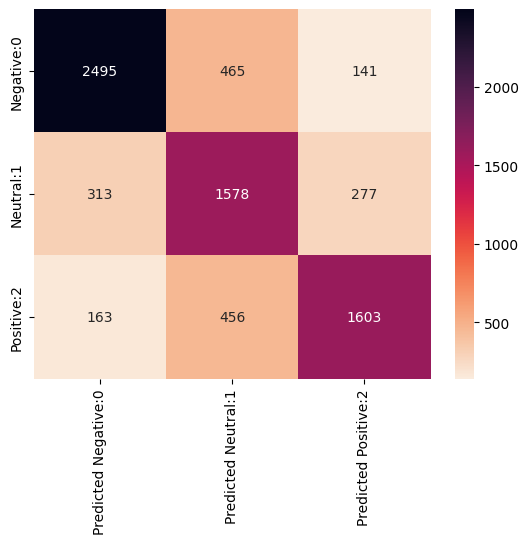

In [ ]:
c_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
c_matrix_data_view = pd.DataFrame(data=c_matrix, columns=['Predicted Negative:0', 'Predicted Neutral:1', 'Predicted Positive:2'],
                                  index=['Negative:0', 'Neutral:1', 'Positive:2'])
sns.heatmap(c_matrix_data_view, annot=True, fmt='d', cmap='rocket_r')

#### The above result shown in the classification report can also be visually seen in the confusion matrix.

# Discussion:

### Strengths of the solution used:

#### 1) As our dataset didn't have many null values, the clear structure of textual representations could be worked out well and without many complications. The simplicity of LightGBM as a gradient boosting ensemble learning algorithm also gives an added advantage in terms of widespread application.
#### 2) The dataset imbalance was worked around by using class_weights parameter and setting it to balanced, which automatically gives inverse weights to classes compared to their input frequency.
#### 3) As LightGBMClassifier works exceptionally fast for its computational ability, our model can be applied in real time and updated in a routine fashion for the customer input and review department to further analyse resulting tweets on the basis of importance and pertinence of sentiment.
#### 4) The f1, precision and recall scores of our model are excellent on the 0 class, i.e. the negative sentiment tweets. This is important as any manufacturing or servicing concern would like to quickly get through and analyse negative feedback on its services and products and improve.


### Weaknesses of the solution used:


#### 1) We have not factored for the columns 'emotion', 'emotion_score' and 'sentiment_score' which might add an extra layer of effectiveness to our model in terms of predictions.
#### 2) Our model gives poor recall score in predicting the neutral sentiment class '1' and to a lower extent for the positive sentiment class '2'. This could be an issue as the company may also want to analyse positive feedback more effectively in order to analyse the success of strategies employed for furthering customer satisfaction.
#### 3) LightGBM works very fast and captures a lot of information from features, however, in practice, working with huge datasets such as tweets and reviews of customers that split into thousands of features post vectorization may be a task much better suited to modern neural network architectures and popular data transformers. Giving more effective ad efficient results.

## Recommendations:

#### I would recommend using this model in real time for sentiment analysis of tweets, comments and other review formats accessed by customers over the internet and targetting the following:
#### 1) Using the segregated texts for further analysis by further classification of the texts into segmental issues pointed out (customer service, hardware quality etc.).
#### 2) Quick response mechanisms such as the use of AI to reach disgruntled customers can also be employed by targetting negative sentiment comments for further action.
#### 3) The model may also be employed to see what segment of customers are the most disgruntled by the services and products offered and subsequently the company may decide to improve on the customer segment or concentrate its resources elsewhere depending on its marketing strategy.